In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sys
from pathlib import Path
print(Path.cwd())

/Users/vaishnukanna/Documents/jegadeesh-titman-momentum/results


In [3]:
PROJECT_ROOT = Path.cwd().parent
sys.path.append(str(PROJECT_ROOT))

In [4]:
from src.risk_metrics import cumulative_returns, max_drawdown, sharpe_ratio, drawdown_series, skewness, annualized_volatility
from src.config import DATA_DIR

In [5]:
path1 = DATA_DIR / "portfolio" / "J6_K6_skip0_returns.csv"
if not path1.exists():
        raise FileNotFoundError(f"Portfolio data not found at {path1}. Run portfolio.py first.")
else:
    portfolio = pd.read_csv(
        path1, 
        parse_dates=["Date"]
        ).set_index("Date")
    print(portfolio.head())

              winner     loser    spread
Date                                    
2001-02-01  0.019540 -0.192802  0.212342
2001-03-01 -0.043318 -0.035796 -0.007522
2001-04-01  0.077074  0.216275 -0.139201
2001-05-01  0.038592 -0.010052  0.048643
2001-06-01  0.033504  0.051841 -0.018337


In [6]:
winner_returns = portfolio['winner']
loser_returns = portfolio['loser']
momentum_returns = portfolio['spread']

In [7]:
path2 = DATA_DIR / "portfolio" /"rf_rate.csv"
if not path2.exists():
    raise FileNotFoundError(f"Risk-free rate data not found at {path2}. Run capm_params.py first.")
else:
    rf = pd.read_csv(
        path2,
        parse_dates=["Date"]
    ).set_index("Date")["Rf_Rate"]

    print(rf.head())

Date
2001-07-01    0.003008
2001-08-01    0.002900
2001-09-01    0.002192
2001-10-01    0.001867
2001-11-01    0.001633
Name: Rf_Rate, dtype: float64


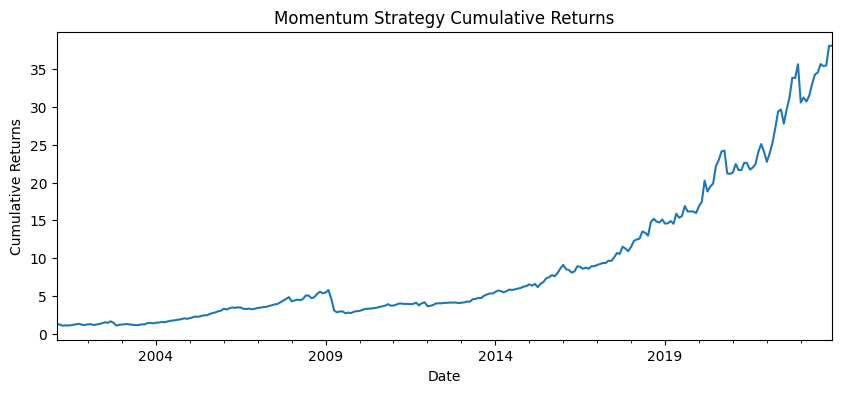

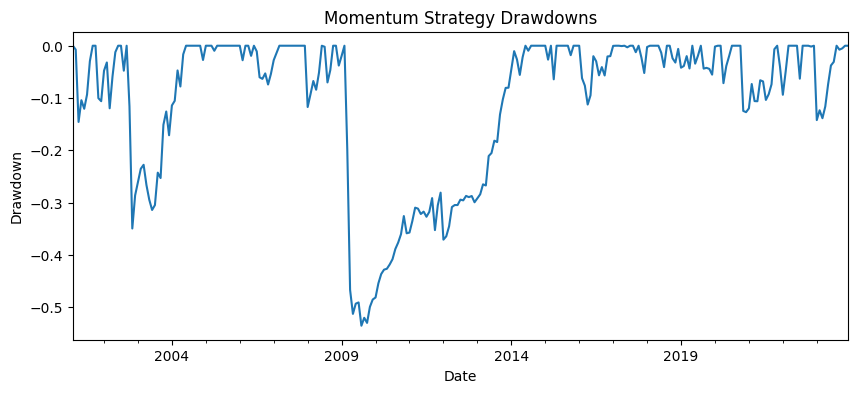

In [8]:
cum_ret = cumulative_returns(portfolio['spread'])
dd = drawdown_series(cum_ret)
cum_ret.plot(figsize=(10, 4), title="Momentum Strategy Cumulative Returns")
plt.ylabel("Cumulative Returns")
plt.show()
dd.plot(figsize=(10, 4), title="Momentum Strategy Drawdowns")
plt.ylabel("Drawdown")
plt.show()

In [9]:
metrics = {
    "Winner": {
        "Annualized Volatility": annualized_volatility(winner_returns),
        "Sharpe": sharpe_ratio(winner_returns, rf),
        "Max Drawdown": max_drawdown(winner_returns),
        "Skew": skewness(winner_returns)
    },
    "Loser": {
        "Annualized Volatility": annualized_volatility(loser_returns),
        "Sharpe": sharpe_ratio(loser_returns, rf),
        "Max Drawdown": max_drawdown(loser_returns),
        "Skew": skewness(loser_returns)
    },
    "Momentum (W-L)": {
        "Annualized Volatility": annualized_volatility(momentum_returns),
        "Sharpe": sharpe_ratio(momentum_returns, rf),
        "Max Drawdown": max_drawdown(momentum_returns),
        "Skew": skewness(momentum_returns)
    }
}

risk_table = pd.DataFrame(metrics).T
risk_table

,Annualized Volatility,Sharpe,Max Drawdown,Skew
Winner,0.196541,1.496569,-0.470775,-0.167442
Loser,0.278503,0.424225,-0.633588,0.527642
Momentum (W-L),0.195909,0.871933,-0.535212,-1.557318


In [10]:
path3 = DATA_DIR / "portfolio" / "market_returns.csv"
if not path3.exists():
    raise FileNotFoundError(f"Risk-free rate data not found at {path3}. Run capm_params.py first.")
else:
    market = pd.read_csv(
        path3,
        parse_dates=["Date"]
        ).set_index("Date")["Market_Returns"]

    print(market.head())

Date
2000-02-01   -0.020108
2000-03-01    0.096720
2000-04-01   -0.030796
2000-05-01   -0.021915
2000-06-01    0.023934
Name: Market_Returns, dtype: float64


In [11]:
market_sharpe = sharpe_ratio(market, rf)
print(f"Market Sharpe Ratio: {market_sharpe:.4f}")

Market Sharpe Ratio: 0.3846
